# Image Classification using CNNs

### Import Libraries

In [6]:
import numpy as np
import pandas as pd
import pathlib 
import PIL
import cv2

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

plt.style.use('ggplot')

### Load in Data

In [7]:
data_dir = pathlib.Path("input/Training_data/")

In [8]:
# Get the number of images
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

600


### Preview Images

In [9]:
# Set path for image classes
driving_license = list(data_dir.glob('driving_license/*'))
social_security = list(data_dir.glob('social_security/*'))
others = list(data_dir.glob('others/*'))

str(driving_license[0])

'input/Training_data/driving_license/63.jpg'

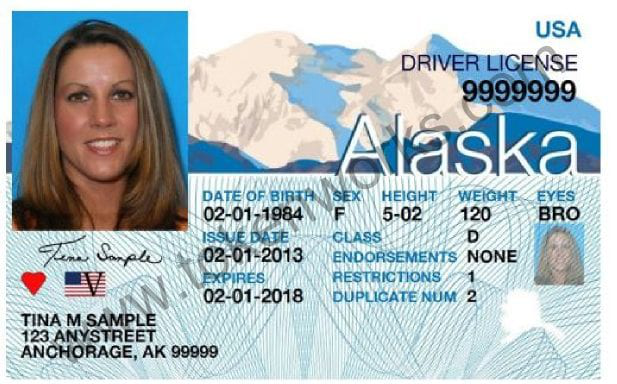

In [10]:
# Preview an image
PIL.Image.open(str(driving_license[12]))

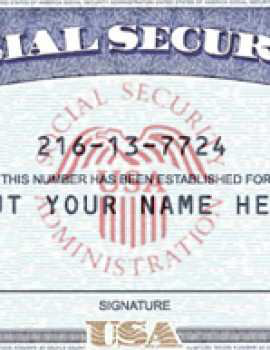

In [11]:
PIL.Image.open(str(social_security[1]))

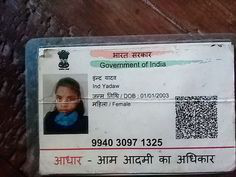

In [12]:
PIL.Image.open(str(others[145]))

In [13]:
# Explore using opencv

# img_color = cv2.imread(str(driving_license[12]),cv2.IMREAD_COLOR)
# cv2.imshow('color image',img_color)  
# cv2.waitKey(0)  
# cv2.destroyAllWindows() 

<AxesSubplot: ylabel='count'>

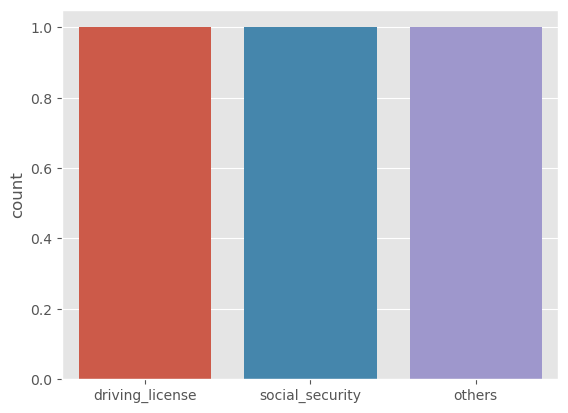

In [14]:
# Display count of each class 
dict_ = {
    "driving_license": len(driving_license),
    "social_security": len(social_security),
    "others": len(others)
}

df = pd.DataFrame([dict_])

sns.countplot(df)

### Load Data and Create Batches using `ImageDataGenerator()`

In [15]:
# Declare Variables
batch_size = 32
img_height = 180
img_width = 180

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.20)

train_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    subset="training",
    class_mode='sparse',
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size)


valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=.20)

valid_generator = valid_datagen.flow_from_directory(
    directory=data_dir,
    subset="validation",
    class_mode='sparse',
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size)

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


### Build the model

In [17]:
# Build the model
def create_model():
    model = Sequential([
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')

])

    return model

model = create_model()
# Compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

model.summary()

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-12-10 20:20:33.409756: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-10 20:20:33.410349: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 64)       0

In [18]:
# Fit the model
history = model.fit(train_generator,
        steps_per_epoch=len(train_generator),
        validation_data=valid_generator,
        validation_steps=len(valid_generator),
        epochs=20
        )

Epoch 1/20


2022-12-10 20:20:33.958968: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-10 20:20:34.147776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/jacob/miniforge3/envs/mlenv/lib/python3.8/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 1.4410 - accuracy: 0.4208

2022-12-10 20:20:39.850536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 7s 234ms/step - loss: 1.4410 - accuracy: 0.4208 - val_loss: 0.9934 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 3s 198ms/step - loss: 0.6505 - accuracy: 0.7708 - val_loss: 0.4919 - val_accuracy: 0.7833
Epoch 3/20
15/15 [==============================] - 3s 188ms/step - loss: 0.3142 - accuracy: 0.8854 - val_loss: 0.3385 - val_accuracy: 0.8500
Epoch 4/20
15/15 [==============================] - 3s 199ms/step - loss: 0.1552 - accuracy: 0.9667 - val_loss: 0.2767 - val_accuracy: 0.9083
Epoch 5/20
15/15 [==============================] - 3s 200ms/step - loss: 0.1082 - accuracy: 0.9688 - val_loss: 0.4649 - val_accuracy: 0.8000
Epoch 6/20
15/15 [==============================] - 3s 196ms/step - loss: 0.0711 - accuracy: 0.9750 - val_loss: 0.2321 - val_accuracy: 0.9083
Epoch 7/20
15/15 [==============================] - 3s 195ms/step - loss: 0.0396 - accuracy: 0.9938 - val_loss: 0.2602 - val_accuracy: 0.9000
Epoch 8/20
15/15 

In [19]:
def learning_curve(history, metrics):
  epochs = range(len(history.history[metrics]))

  plt.figure(figsize=(9, 5))
  plt.plot(epochs, history.history[metrics], "b-", label=f"Training {metrics}")
  plt.plot(epochs, history.history["val_" + metrics], "b--", label=f"Testing {metrics}")
  plt.xlabel("Epoch")
  plt.ylabel(f"{metrics}")
  plt.title(f"Training vs Testing {metrics}")
  plt.legend()
  plt.show()

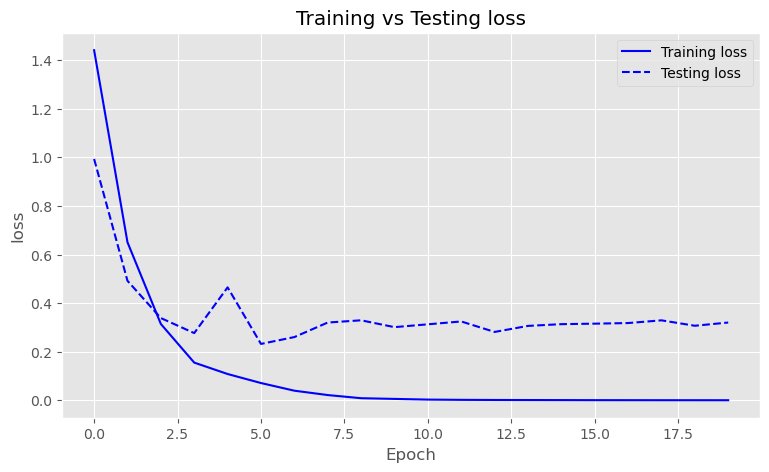

In [20]:
learning_curve(history, "loss")

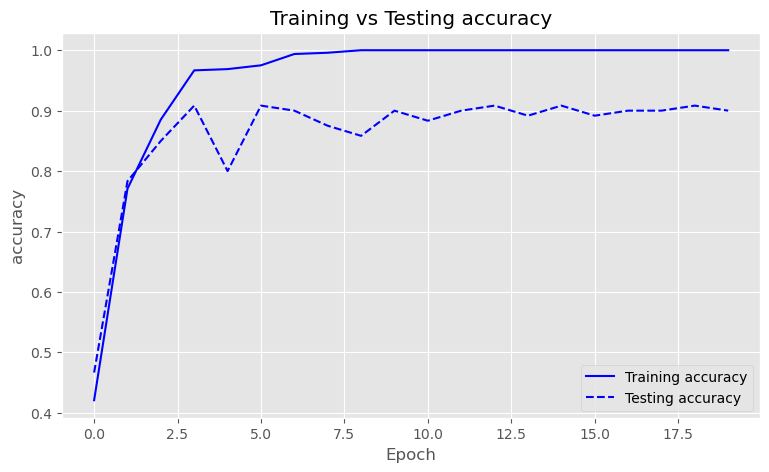

In [21]:
learning_curve(history, "accuracy")

### Data Augmentation

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    subset="training",
    class_mode='sparse',
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size)


valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=.20)

valid_generator = valid_datagen.flow_from_directory(
    directory=data_dir,
    subset="validation",
    class_mode='sparse',
    target_size=(img_height, img_width),
    shuffle=True,
    batch_size=batch_size)

model = create_model()
# Compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

model.summary()

Found 600 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        18496     
                                      

In [23]:
# Fit the model
history = model.fit(train_generator,
        steps_per_epoch=len(train_generator),
        validation_data=valid_generator,
        validation_steps=len(valid_generator),
        epochs=30
        )

Epoch 1/30


2022-12-10 20:21:37.894739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - ETA: 0s - loss: 1.4699 - accuracy: 0.4050

2022-12-10 20:21:42.770591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 6s 281ms/step - loss: 1.4699 - accuracy: 0.4050 - val_loss: 1.0599 - val_accuracy: 0.3167
Epoch 2/30
19/19 [==============================] - 5s 268ms/step - loss: 0.9276 - accuracy: 0.5350 - val_loss: 1.0362 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 5s 270ms/step - loss: 0.7666 - accuracy: 0.6800 - val_loss: 0.7871 - val_accuracy: 0.6667
Epoch 4/30
19/19 [==============================] - 5s 269ms/step - loss: 0.6045 - accuracy: 0.7467 - val_loss: 0.6350 - val_accuracy: 0.7667
Epoch 5/30
19/19 [==============================] - 5s 273ms/step - loss: 0.5458 - accuracy: 0.7833 - val_loss: 0.5394 - val_accuracy: 0.7833
Epoch 6/30
19/19 [==============================] - 5s 271ms/step - loss: 0.4277 - accuracy: 0.8317 - val_loss: 0.4805 - val_accuracy: 0.8000
Epoch 7/30
19/19 [==============================] - 5s 275ms/step - loss: 0.3909 - accuracy: 0.8467 - val_loss: 0.3519 - val_accuracy: 0.8583
Epoch 8/30
19/19 

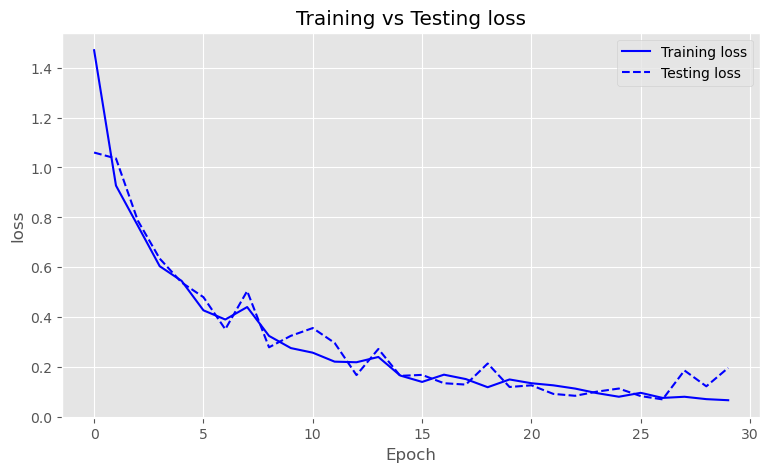

In [24]:
learning_curve(history, "loss")

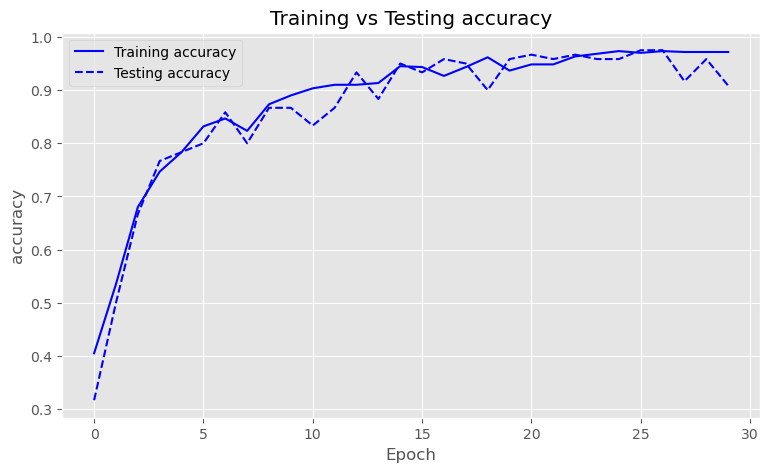

In [25]:
learning_curve(history, "accuracy")

### Load data and create `tf.Dataset()` using a Keras `utility`

In [26]:
# Create Training Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 480 files for training.


In [27]:
# Create Validation Dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 120 files for validation.


In [28]:
class_names = train_ds.class_names
class_names

['driving_license', 'others', 'social_security']

### Optimize data loader pipeline with `tf.data.AUTOTUNE`

In [29]:
AUTOTUNE = tf.data.AUTOTUNE


train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Build the model

In [30]:
# Get the number of output classes
num_classes = len(class_names)

# Build the model

def build_model():

    model = Sequential([
    keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)

    ])

    return model
    
model = build_model()

In [31]:
# Compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [32]:
# Fit the model
history = model.fit(train_ds,
        steps_per_epoch=len(train_ds),
        validation_data=val_ds,
        validation_steps=len(val_ds),
        epochs=20
        )

Epoch 1/20


2022-12-10 20:24:13.502368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.4832 - accuracy: 0.3479

2022-12-10 20:24:14.587392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 2s 47ms/step - loss: 1.4832 - accuracy: 0.3479 - val_loss: 1.0754 - val_accuracy: 0.3250
Epoch 2/20
15/15 [==============================] - 0s 22ms/step - loss: 1.0055 - accuracy: 0.5479 - val_loss: 0.7156 - val_accuracy: 0.8417
Epoch 3/20
15/15 [==============================] - 0s 22ms/step - loss: 0.6098 - accuracy: 0.7563 - val_loss: 0.4432 - val_accuracy: 0.8500
Epoch 4/20
15/15 [==============================] - 0s 22ms/step - loss: 0.3385 - accuracy: 0.8833 - val_loss: 0.2505 - val_accuracy: 0.8917
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.2063 - accuracy: 0.9375 - val_loss: 0.2911 - val_accuracy: 0.8667
Epoch 6/20
15/15 [==============================] - 0s 22ms/step - loss: 0.1414 - accuracy: 0.9521 - val_loss: 0.2576 - val_accuracy: 0.8917
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.1031 - accuracy: 0.9646 - val_loss: 0.1669 - val_accuracy: 0.9333
Epoch 8/20
15/15 [======

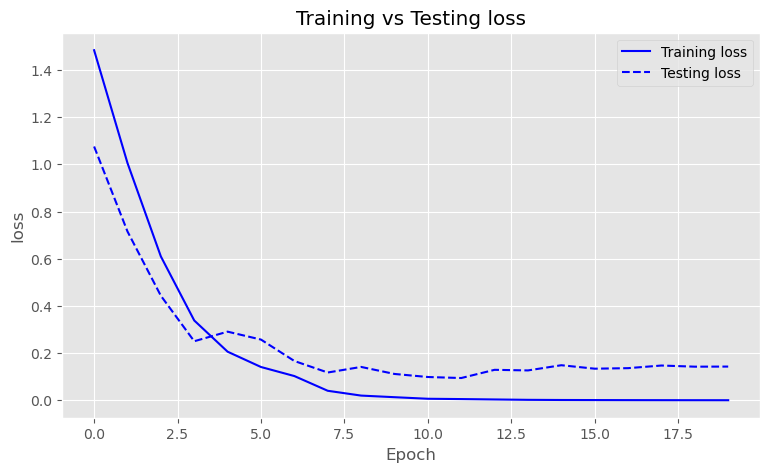

In [33]:
learning_curve(history, "loss")

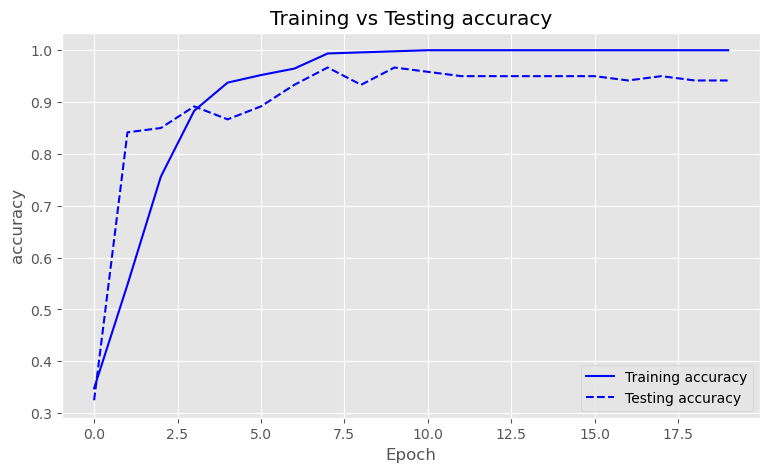

In [34]:
learning_curve(history, "accuracy")

### Data Augmentation

In [35]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

In [36]:
def build_aug_model():
  
  model  = Sequential([
    data_augmentation,
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
  ])

  return model

model = build_aug_model()

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [38]:
# Fit the model
history = model.fit(train_ds,
        steps_per_epoch=len(train_ds),
        validation_data=val_ds,
        validation_steps=len(val_ds),
        epochs=30
        )

Epoch 1/30


2022-12-10 20:24:23.353771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 8s 346ms/step - loss: 1.6646 - accuracy: 0.3854 - val_loss: 1.0347 - val_accuracy: 0.5833
Epoch 2/30


2022-12-10 20:24:30.581442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 5s 323ms/step - loss: 0.9089 - accuracy: 0.7063 - val_loss: 0.5873 - val_accuracy: 0.8417
Epoch 3/30
15/15 [==============================] - 5s 325ms/step - loss: 0.5418 - accuracy: 0.8021 - val_loss: 0.4186 - val_accuracy: 0.8500
Epoch 4/30
15/15 [==============================] - 5s 320ms/step - loss: 0.4044 - accuracy: 0.8542 - val_loss: 0.4953 - val_accuracy: 0.8083
Epoch 5/30
15/15 [==============================] - 5s 321ms/step - loss: 0.3814 - accuracy: 0.8583 - val_loss: 0.3277 - val_accuracy: 0.8750
Epoch 6/30
15/15 [==============================] - 5s 322ms/step - loss: 0.3022 - accuracy: 0.8979 - val_loss: 0.2723 - val_accuracy: 0.9083
Epoch 7/30
15/15 [==============================] - 5s 323ms/step - loss: 0.2301 - accuracy: 0.9167 - val_loss: 0.3136 - val_accuracy: 0.8833
Epoch 8/30
15/15 [==============================] - 5s 323ms/step - loss: 0.2192 - accuracy: 0.9208 - val_loss: 0.2180 - val_accuracy: 0.9167
Epoch 9/30
15/15 

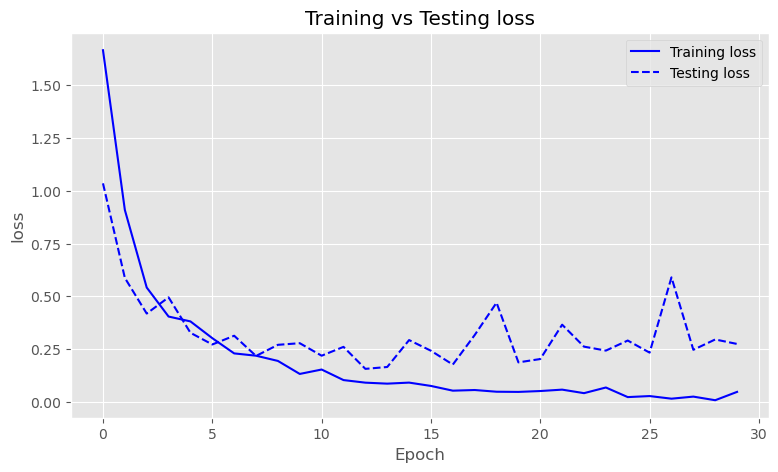

In [39]:
learning_curve(history, "loss")

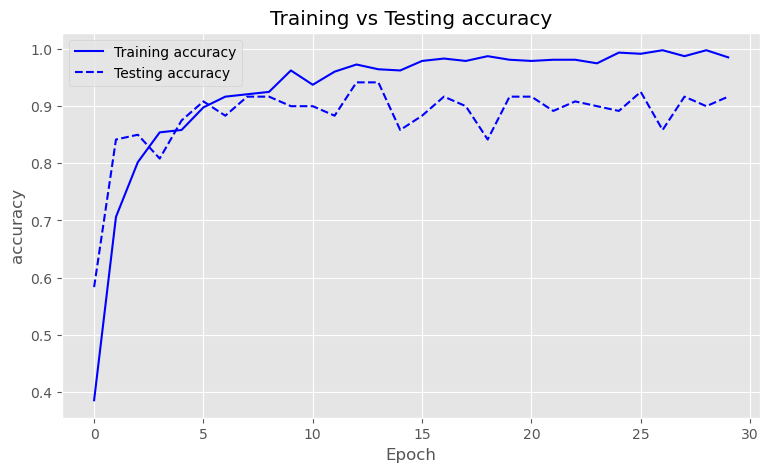

In [40]:
learning_curve(history, "accuracy")

In [48]:
# Save the model
model.save("output/cnn-model.h5")

In [49]:
# Load the model
model = tf.keras.models.load_model("output/cnn-model.h5")

### Model Prediction

In [41]:
# Load in test data path
test_data_dir = pathlib.Path("input/Testing_Data/")

In [42]:
# Get the image count of the testing dataset
image_count = len(list(test_data_dir.glob('*/*')))
print(image_count)

150


In [43]:
# Set path for image classes
test_driving_license = list(test_data_dir.glob('driving_license/*'))
test_social_security = list(test_data_dir.glob('social_security/*'))
test_others = list(test_data_dir.glob('others/*'))

In [44]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 150 files belonging to 3 classes.


2022-12-10 20:41:41.755469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


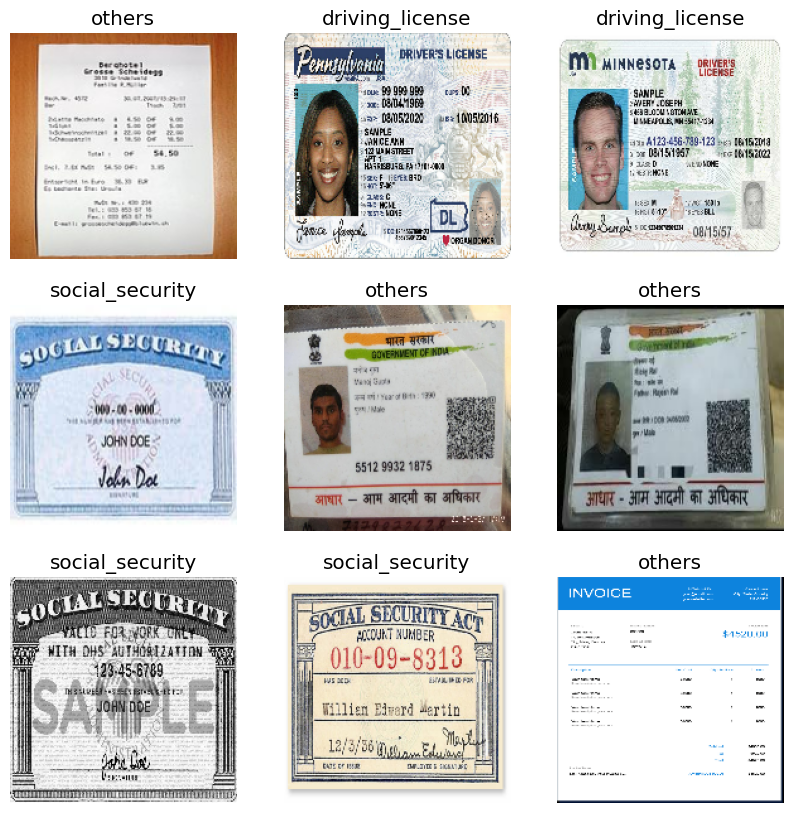

In [60]:
# Preview test image set
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [61]:
# Evaluate the model
model.evaluate(test_ds)

2022-12-10 20:44:16.209302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-10 20:44:16.248639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/5 [==============================] - 1s 52ms/step - loss: 0.2249 - accuracy: 0.9400


[0.2248891294002533, 0.9399999976158142]

In [68]:
# Get testing image
img = keras.utils.load_img(
    "input/Testing_Data/others/111.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)

In [69]:
# Make prediction
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 13ms/step
This image most likely belongs to others with a 99.90 percent confidence.
